<a href="https://colab.research.google.com/github/sautiw/Numerical-Methods/blob/main/Project_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 8**
---
Saurabh Tiwari

Salin Giri

Rahul Gauli

## **1.Introduction: Ordinary Differential Equations**

An ordinary differential equation is an equation that includes an unkown along with its ordinary derivatives (as opposed to partial derivatives). First order ODEs include only first derivatives of an unknown.
The aim of this project is to compare different methods to solve first order ordinary differential equations known as ODEs. We will be exploring the analytical solution and compare it with 2 numerical methods.

Consider the following first order differential equation.
$$
\frac{dy}{dx} = f(x)\left(1-y\right)\quad\quad y(0) = 2
$$

We will take $$f(x) = x + \cos x$$

## **2. Analytical Solution**
The solution of this ODE is of the form:
$$y = 1 + C e^{-\int{f(x)dx}}  $$
where $C$ is a constant to be calculated using the boundary condition $y(0) = 2$.

$$\int{f(x)dx} = \int{(x+\cos x)dx} \\= \frac{x^2}{2} + \sin x$$

(note that there is no need to take the constant of integration into account here as it is included in the constant $C$ mentioned above).

Hence, $$y = 1 + Ce^{-\frac{X^2}{2} - \sin x}$$.
We have: $$y(0) = 2$$

then: $$1 + Ce^{-\frac{0^2}{2} - \sin 0} = 2$$
$$ C = 1$$

Finally, the analytical solution is:$$y = 1 + e^{-\frac{X^2}{2} - \sin x}$$


In [ ]:
#Load your packages
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math


%matplotlib inline

In [ ]:
g = lambda x: 1 + np.exp(-np.power(x, 2) - np.sin(x)) #this is the analytic solution
interval = [0, math.pi]
t = np.linspace(interval[0], interval[1], 100) #this is the interval I'll look at the solution for
analytical_solution = g(t)

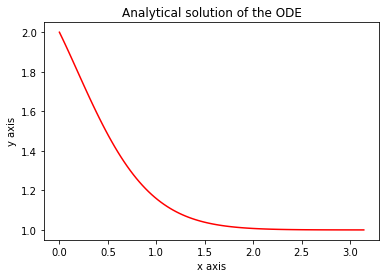

In [ ]:
plt.title("Analytical solution of the ODE")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(t, analytical_solution, 'r')

## **3. Numerical Solutions**

### ***3.1 Euler's Method***

For our first numerical method, we will approximate the solution numerically using Euler's method. We will be computing the next value using
$$
y_{i+1} = y_i + l(x_i,y_i)h
$$
for h the step size, $h = x_{i+1}-x_i$.

In [ ]:
def f(x):
  return x + np.cos(x)
l = lambda x,y: f(x)*(1-y) #left side of ODE
def eulerMethod(function, initialValue, intervalForSolution):
  array = []
  y = initialValue
  h = intervalForSolution[1]-intervalForSolution[0]
  for i in intervalForSolution:
    array.append([y])
    y = y + function(i,y)*h
  return np.array(array)

In [ ]:
euler_sol = eulerMethod(l,2,t)


In [ ]:
def calculate_relative_error(analytical, numerical):
  return np.abs(analytical - numerical)/analytical

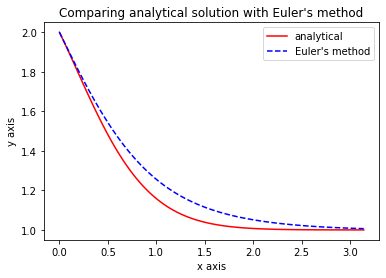

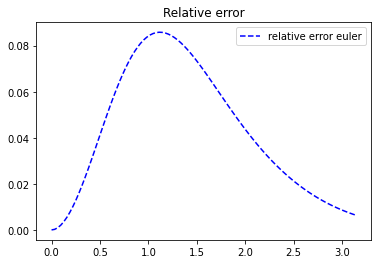

In [ ]:
plt.title("Comparing analytical solution with Euler's method")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(t, analytical_solution, 'r', label="analytical")
plt.plot(t, euler_sol, 'b--', label="Euler's method")
relative_error_euler = calculate_relative_error(g(t), euler_sol[:, 0])
plt.legend()

plt.figure()
plt.title("Relative error")
plt.plot(t, relative_error_euler, 'b--', label='relative error euler')
plt.legend()


We can see that the maximum relative error is 8% at x around 1.

### ***3.2 Runge-Kutta 4th Order***

Much like Euler's method we are interested in solving a differential equation fo the form, $\frac{dy}{dx}= f(x,y)$.  We will have an initial point and iterate to the next using
$$
y_{i+1} = y_i + \frac h6 \left( k_1+2k_2+2k_3+k_4\right)
$$
where 
$$
\begin{align}
&k_1 = f(x_i,y_i)\\
&k_2 = f\left(x_i+\frac h2,y_i+\frac {k_1h}2\right)\\
&k_3 = f\left(x_i+\frac h 2,y_i +\frac{k_2 h}2\right)\\
&k_4 = f\left(x_i+h,y_i +k_3 h\right)
\end{align}
$$

In [ ]:
def rungeKutta(function, initialValue, intervalForSolution):
  h = intervalForSolution[1]-intervalForSolution[0]
  y = initialValue
  sol = []
  for i in intervalForSolution:
    sol.append([y])
    k1 = function(i,y)
    k2 = function(i+h/2,y+k1*h/2)
    k3 = function(i+ h/2,y+k2*h/2)
    k4 = function(i+ h , y+k3*h)
    y = y+h/6*(k1+2*k2+2*k3+k4)
  return np.array(sol)

In [ ]:
runge_kutta_sol = rungeKutta(l, 2, t)

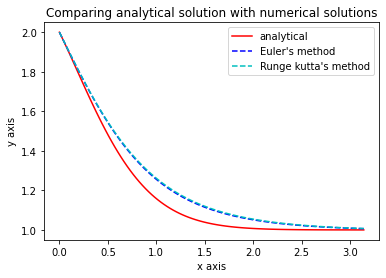

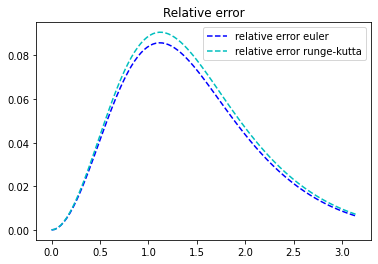

In [ ]:
plt.title("Comparing analytical solution with numerical solutions")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(t, analytical_solution, 'r', label="analytical")
plt.plot(t, euler_sol, 'b--', label="Euler's method")
plt.plot(t, runge_kutta_sol, 'c--', label="Runge kutta's method")
plt.legend()

plt.figure()
plt.title("Relative error")
relative_error_rk = calculate_relative_error(g(t), runge_kutta_sol[:, 0])
plt.plot(t, relative_error_euler, 'b--', label='relative error euler')
plt.plot(t, relative_error_rk, 'c--', label='relative error runge-kutta')
plt.legend()

We can see that the euler method and runge kutta methods have similar accuracy. The runge kutta method imposes a slightly greater error.

## 4. Comparision and Discussion

In this section, we will be computing the relative absolute error of each of the numerical methods at the middle and end of our interval

In [ ]:
end_of_interval_index = t.shape[0] - 1
mid_of_interval_index = int(t.shape[0]/2 -1)
points_to_calculate_error = [mid_of_interval_index, end_of_interval_index]
solutions = [euler_sol, runge_kutta_sol]
errors = [["Euler"], ["Runge-Kutta"]]
for i,solution in enumerate(solutions):
  for point in points_to_calculate_error:
    errors[i].extend(calculate_relative_error(analytical_solution[point], solution[point]))


from tabulate import tabulate

table = tabulate(errors, headers=['numerical_method', 'mid_of_interval', 'end_of_interval'], tablefmt='orgtbl')

print(table)

| numerical_method   |   mid_of_interval |   end_of_interval |
|--------------------+-------------------+-------------------|
| Euler              |         0.0701719 |        0.00638493 |
| Runge-Kutta        |         0.0746004 |        0.00713979 |


We can see that these methods have similar performace when $h = \pi/100$.
Let us compare the performace of these methods for different values of $h$.

In [ ]:
def plot_relative_errors(nb_of_bins):  
  t = np.linspace(interval[0], interval[1], nb_of_bins) #this is the interval I'll look at the solution for
  analytical_solution = g(t)
  euler_sol = eulerMethod(l,2,t)
  runge_kutta_sol = rungeKutta(l, 2, t)
  relative_error_rk = calculate_relative_error(g(t), runge_kutta_sol[:, 0])
  relative_error_euler = calculate_relative_error(g(t), euler_sol[:, 0])
  plt.figure()
  plt.title("Relative error for h = pi/{}".format(nb_of_bins))
  relative_error_rk = calculate_relative_error(g(t), runge_kutta_sol[:, 0])
  plt.plot(t, relative_error_euler, 'b--', label='relative error euler')
  plt.plot(t, relative_error_rk, 'c--', label='relative error runge-kutta')
  plt.legend()

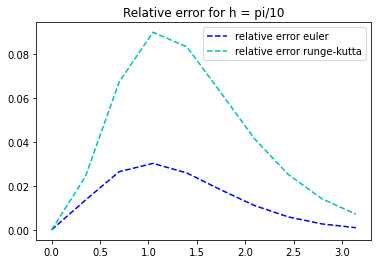

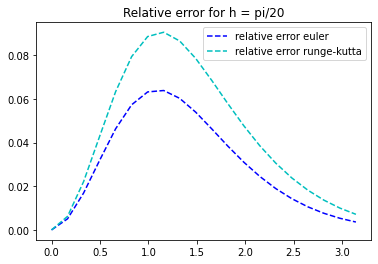

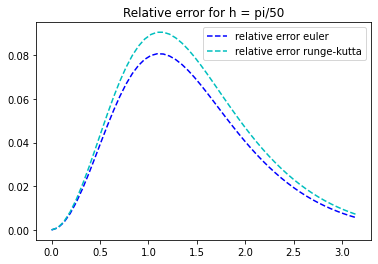

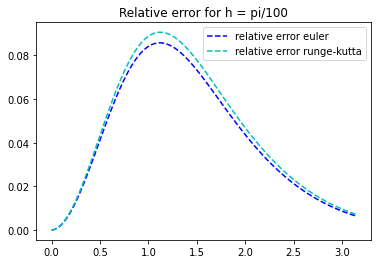

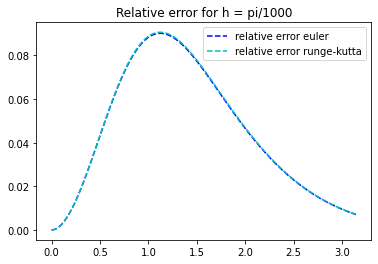

In [ ]:
bins = [10, 20, 50, 100, 1000]
for bin in bins:
  plot_relative_errors(bin)


We finally conclude that as h decreases, the performance of euler approaches that of Runge kutta.

In general, Runge-kutta 4th orfer is more accurate than Euler for the same $h$.
This is because the error of Runge-kutta is of the 5th order; whereas that of euler is of the second order.
Runge-kutta can acheive higher accuracy with less computation.
In some scenarios (like ours), the euler method might have beter accuracy depending on the ODE and on $h$. 